In [2]:
#### PACKAGE IMPORTS ####
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
%matplotlib inline

In [3]:
def read_in_and_split_data(iris_data):
    iris_data = datasets.load_iris()
    data = iris_data['data']
    targets = iris_data['target']
    train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

    return (train_data, test_data, train_targets, test_targets)

In [4]:
#Function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [5]:
# Converting targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [6]:
def get_model(input_shape,dropout_rate,weight_decay):
    model = Sequential([
                          Dense(64, activation='relu', input_shape=input_shape,
                              kernel_initializer = tf.keras.initializers.he_uniform(),
                              bias_initializer='ones', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dropout(dropout_rate),
                        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        tf.keras.layers.BatchNormalization(),
                        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dropout(dropout_rate),
                        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
                        Dense(3, activation='softmax')
    ])
    return model

In [7]:
model = get_model(train_data[0].shape,0.3, 0.001)

In [8]:
def compile_model(model):
    opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
compile_model(model)

In [10]:
def train_model(model, train_data, train_targets, epochs):
    history=model.fit(train_data,train_targets,epochs=epochs,batch_size=40,validation_split=0.15,verbose=1)
    return history

In [11]:
reg_history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 0s 98ms/step - loss: 1.9979 - accuracy: 0.4298 - val_loss: 2.0984 - val_accuracy: 0.1905
Epoch 2/800
3/3 [==============================] - 0s 9ms/step - loss: 1.9866 - accuracy: 0.3772 - val_loss: 2.0668 - val_accuracy: 0.1905
Epoch 3/800
3/3 [==============================] - 0s 9ms/step - loss: 2.0118 - accuracy: 0.4035 - val_loss: 2.0418 - val_accuracy: 0.1905
Epoch 4/800
3/3 [==============================] - 0s 8ms/step - loss: 1.9752 - accuracy: 0.3509 - val_loss: 2.0160 - val_accuracy: 0.1905
Epoch 5/800
3/3 [==============================] - 0s 9ms/step - loss: 1.9518 - accuracy: 0.4298 - val_loss: 1.9918 - val_accuracy: 0.1905
Epoch 6/800
3/3 [==============================] - 0s 9ms/step - loss: 1.9601 - accuracy: 0.3947 - val_loss: 1.9710 - val_accuracy: 0.2857
Epoch 7/800
3/3 [==============================] - 0s 8ms/step - loss: 1.8839 - accuracy: 0.4825 - val_loss: 1.9493 - val_accuracy: 0.2857
Epoch 8/800
3/3 [=========

3/3 [==============================] - 0s 9ms/step - loss: 1.2748 - accuracy: 0.7895 - val_loss: 1.3327 - val_accuracy: 0.7143
Epoch 60/800
3/3 [==============================] - 0s 9ms/step - loss: 1.2915 - accuracy: 0.7281 - val_loss: 1.3296 - val_accuracy: 0.7143
Epoch 61/800
3/3 [==============================] - 0s 9ms/step - loss: 1.2813 - accuracy: 0.7895 - val_loss: 1.3265 - val_accuracy: 0.7143
Epoch 62/800
3/3 [==============================] - 0s 9ms/step - loss: 1.2690 - accuracy: 0.7456 - val_loss: 1.3204 - val_accuracy: 0.7143
Epoch 63/800
3/3 [==============================] - 0s 8ms/step - loss: 1.2590 - accuracy: 0.8333 - val_loss: 1.3128 - val_accuracy: 0.7619
Epoch 64/800
3/3 [==============================] - 0s 9ms/step - loss: 1.2680 - accuracy: 0.7719 - val_loss: 1.3030 - val_accuracy: 0.7619
Epoch 65/800
3/3 [==============================] - 0s 8ms/step - loss: 1.2674 - accuracy: 0.7719 - val_loss: 1.2944 - val_accuracy: 0.8095
Epoch 66/800
3/3 [===============

3/3 [==============================] - 0s 10ms/step - loss: 0.8738 - accuracy: 0.9561 - val_loss: 0.9640 - val_accuracy: 0.9524
Epoch 118/800
3/3 [==============================] - 0s 10ms/step - loss: 0.9157 - accuracy: 0.9386 - val_loss: 0.9737 - val_accuracy: 0.9524
Epoch 119/800
3/3 [==============================] - 0s 10ms/step - loss: 0.8600 - accuracy: 0.9649 - val_loss: 0.9500 - val_accuracy: 0.9048
Epoch 120/800
3/3 [==============================] - 0s 10ms/step - loss: 0.8470 - accuracy: 0.9825 - val_loss: 0.9421 - val_accuracy: 0.9048
Epoch 121/800
3/3 [==============================] - 0s 10ms/step - loss: 0.8525 - accuracy: 0.9737 - val_loss: 0.9291 - val_accuracy: 0.9048
Epoch 122/800
3/3 [==============================] - 0s 10ms/step - loss: 0.9310 - accuracy: 0.9474 - val_loss: 0.9258 - val_accuracy: 0.9048
Epoch 123/800
3/3 [==============================] - 0s 11ms/step - loss: 0.8464 - accuracy: 0.9649 - val_loss: 0.9326 - val_accuracy: 0.9048
Epoch 124/800
3/3 [=

Epoch 175/800
3/3 [==============================] - 0s 10ms/step - loss: 0.8204 - accuracy: 0.9737 - val_loss: 0.9419 - val_accuracy: 0.9048
Epoch 176/800
3/3 [==============================] - 0s 10ms/step - loss: 0.7807 - accuracy: 0.9825 - val_loss: 0.9546 - val_accuracy: 0.9048
Epoch 177/800
3/3 [==============================] - 0s 11ms/step - loss: 0.8113 - accuracy: 0.9649 - val_loss: 0.9585 - val_accuracy: 0.9048
Epoch 178/800
3/3 [==============================] - 0s 10ms/step - loss: 0.7675 - accuracy: 0.9825 - val_loss: 0.9566 - val_accuracy: 0.9048
Epoch 179/800
3/3 [==============================] - 0s 10ms/step - loss: 0.7718 - accuracy: 0.9737 - val_loss: 0.9530 - val_accuracy: 0.9048
Epoch 180/800
3/3 [==============================] - 0s 12ms/step - loss: 0.7874 - accuracy: 0.9649 - val_loss: 0.9539 - val_accuracy: 0.9048
Epoch 181/800
3/3 [==============================] - 0s 11ms/step - loss: 0.7879 - accuracy: 0.9737 - val_loss: 0.9502 - val_accuracy: 0.9048
Epoch 

Epoch 233/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7132 - accuracy: 0.9912 - val_loss: 0.9303 - val_accuracy: 0.9524
Epoch 234/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7640 - accuracy: 0.9825 - val_loss: 0.9295 - val_accuracy: 0.9524
Epoch 235/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7206 - accuracy: 0.9912 - val_loss: 0.9348 - val_accuracy: 0.9048
Epoch 236/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7372 - accuracy: 0.9649 - val_loss: 0.9517 - val_accuracy: 0.9048
Epoch 237/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7787 - accuracy: 0.9649 - val_loss: 0.9875 - val_accuracy: 0.9048
Epoch 238/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7585 - accuracy: 0.9561 - val_loss: 0.9724 - val_accuracy: 0.9048
Epoch 239/800
3/3 [==============================] - 0s 11ms/step - loss: 0.7397 - accuracy: 0.9825 - val_loss: 0.9315 - val_accuracy: 0.9048
Epoch 240/80

Epoch 291/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7075 - accuracy: 0.9825 - val_loss: 0.9218 - val_accuracy: 0.9048
Epoch 292/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.9737 - val_loss: 0.8947 - val_accuracy: 0.9048
Epoch 293/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7213 - accuracy: 0.9737 - val_loss: 0.8737 - val_accuracy: 0.9524
Epoch 294/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7122 - accuracy: 0.9825 - val_loss: 0.8710 - val_accuracy: 0.9524
Epoch 295/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6954 - accuracy: 0.9737 - val_loss: 0.8797 - val_accuracy: 0.9048
Epoch 296/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7197 - accuracy: 0.9649 - val_loss: 0.8801 - val_accuracy: 0.9048
Epoch 297/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 1.0000 - val_loss: 0.8808 - val_accuracy: 0.9048
Epoch 298/800

3/3 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.9912 - val_loss: 0.9240 - val_accuracy: 0.9048
Epoch 350/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6515 - accuracy: 0.9912 - val_loss: 0.9112 - val_accuracy: 0.9048
Epoch 351/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.9737 - val_loss: 0.8777 - val_accuracy: 0.9048
Epoch 352/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6586 - accuracy: 0.9912 - val_loss: 0.8724 - val_accuracy: 0.9524
Epoch 353/800
3/3 [==============================] - 0s 9ms/step - loss: 0.7117 - accuracy: 0.9737 - val_loss: 0.8732 - val_accuracy: 0.9524
Epoch 354/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.9825 - val_loss: 0.8727 - val_accuracy: 0.9524
Epoch 355/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6793 - accuracy: 0.9649 - val_loss: 0.8846 - val_accuracy: 0.9048
Epoch 356/800
3/3 [========

3/3 [==============================] - 0s 15ms/step - loss: 0.6431 - accuracy: 0.9825 - val_loss: 0.8462 - val_accuracy: 0.9048
Epoch 408/800
3/3 [==============================] - 0s 17ms/step - loss: 0.6334 - accuracy: 0.9825 - val_loss: 0.8454 - val_accuracy: 0.9048
Epoch 409/800
3/3 [==============================] - 0s 17ms/step - loss: 0.6743 - accuracy: 0.9561 - val_loss: 0.8356 - val_accuracy: 0.9048
Epoch 410/800
3/3 [==============================] - 0s 15ms/step - loss: 0.6293 - accuracy: 0.9912 - val_loss: 0.8273 - val_accuracy: 0.9524
Epoch 411/800
3/3 [==============================] - 0s 17ms/step - loss: 0.6386 - accuracy: 0.9825 - val_loss: 0.8269 - val_accuracy: 0.9524
Epoch 412/800
3/3 [==============================] - 0s 16ms/step - loss: 0.6427 - accuracy: 0.9825 - val_loss: 0.8300 - val_accuracy: 0.9524
Epoch 413/800
3/3 [==============================] - 0s 17ms/step - loss: 0.6590 - accuracy: 0.9737 - val_loss: 0.8321 - val_accuracy: 0.9048
Epoch 414/800
3/3 [=

Epoch 465/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6241 - accuracy: 0.9825 - val_loss: 0.8787 - val_accuracy: 0.9048
Epoch 466/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6324 - accuracy: 0.9825 - val_loss: 0.9245 - val_accuracy: 0.9048
Epoch 467/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.9737 - val_loss: 0.8780 - val_accuracy: 0.9048
Epoch 468/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6184 - accuracy: 0.9825 - val_loss: 0.8476 - val_accuracy: 0.9524
Epoch 469/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6115 - accuracy: 0.9825 - val_loss: 0.8534 - val_accuracy: 0.9524
Epoch 470/800
3/3 [==============================] - 0s 10ms/step - loss: 0.6216 - accuracy: 0.9912 - val_loss: 0.8547 - val_accuracy: 0.9524
Epoch 471/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 0.9825 - val_loss: 0.8405 - val_accuracy: 0.9524
Epoch 472/80

3/3 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.9825 - val_loss: 0.8860 - val_accuracy: 0.9048
Epoch 524/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5858 - accuracy: 0.9912 - val_loss: 0.8695 - val_accuracy: 0.9048
Epoch 525/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5763 - accuracy: 1.0000 - val_loss: 0.8596 - val_accuracy: 0.9048
Epoch 526/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5775 - accuracy: 1.0000 - val_loss: 0.8548 - val_accuracy: 0.9524
Epoch 527/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.9912 - val_loss: 0.8515 - val_accuracy: 0.9524
Epoch 528/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5989 - accuracy: 0.9737 - val_loss: 0.8524 - val_accuracy: 0.9524
Epoch 529/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5893 - accuracy: 0.9912 - val_loss: 0.8959 - val_accuracy: 0.9048
Epoch 530/800
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.6375 - accuracy: 0.9649 - val_loss: 0.9435 - val_accuracy: 0.9048
Epoch 582/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5838 - accuracy: 0.9825 - val_loss: 0.9708 - val_accuracy: 0.9048
Epoch 583/800
3/3 [==============================] - 0s 10ms/step - loss: 0.5664 - accuracy: 1.0000 - val_loss: 0.9646 - val_accuracy: 0.9048
Epoch 584/800
3/3 [==============================] - 0s 10ms/step - loss: 0.6236 - accuracy: 0.9649 - val_loss: 0.8541 - val_accuracy: 0.9048
Epoch 585/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5990 - accuracy: 0.9737 - val_loss: 0.8328 - val_accuracy: 0.9524
Epoch 586/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5718 - accuracy: 0.9825 - val_loss: 0.8197 - val_accuracy: 0.9524
Epoch 587/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5997 - accuracy: 0.9825 - val_loss: 0.8144 - val_accuracy: 0.9524
Epoch 588/800
3/3 [======

3/3 [==============================] - 0s 9ms/step - loss: 0.6375 - accuracy: 0.9386 - val_loss: 0.7847 - val_accuracy: 0.9524
Epoch 640/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5432 - accuracy: 1.0000 - val_loss: 0.8220 - val_accuracy: 0.9048
Epoch 641/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6031 - accuracy: 0.9825 - val_loss: 0.9008 - val_accuracy: 0.9048
Epoch 642/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5639 - accuracy: 0.9825 - val_loss: 0.9407 - val_accuracy: 0.9048
Epoch 643/800
3/3 [==============================] - 0s 9ms/step - loss: 0.6324 - accuracy: 0.9561 - val_loss: 0.8770 - val_accuracy: 0.9048
Epoch 644/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5583 - accuracy: 0.9912 - val_loss: 0.8157 - val_accuracy: 0.9048
Epoch 645/800
3/3 [==============================] - 0s 10ms/step - loss: 0.5635 - accuracy: 0.9825 - val_loss: 0.7934 - val_accuracy: 0.9048
Epoch 646/800
3/3 [=======

3/3 [==============================] - 0s 9ms/step - loss: 0.5445 - accuracy: 0.9912 - val_loss: 0.8014 - val_accuracy: 0.9524
Epoch 698/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.9737 - val_loss: 0.8130 - val_accuracy: 0.9524
Epoch 699/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5272 - accuracy: 1.0000 - val_loss: 0.8179 - val_accuracy: 0.9524
Epoch 700/800
3/3 [==============================] - 0s 8ms/step - loss: 0.5257 - accuracy: 1.0000 - val_loss: 0.8269 - val_accuracy: 0.9524
Epoch 701/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5348 - accuracy: 0.9912 - val_loss: 0.8458 - val_accuracy: 0.9048
Epoch 702/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5195 - accuracy: 1.0000 - val_loss: 0.8654 - val_accuracy: 0.9048
Epoch 703/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5274 - accuracy: 0.9912 - val_loss: 0.8612 - val_accuracy: 0.9048
Epoch 704/800
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.5236 - accuracy: 0.9912 - val_loss: 0.8397 - val_accuracy: 0.9048
Epoch 756/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5361 - accuracy: 0.9825 - val_loss: 0.8529 - val_accuracy: 0.9048
Epoch 757/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5128 - accuracy: 0.9912 - val_loss: 0.8566 - val_accuracy: 0.9048
Epoch 758/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5196 - accuracy: 0.9912 - val_loss: 0.8228 - val_accuracy: 0.9048
Epoch 759/800
3/3 [==============================] - 0s 8ms/step - loss: 0.5150 - accuracy: 1.0000 - val_loss: 0.7812 - val_accuracy: 0.9524
Epoch 760/800
3/3 [==============================] - 0s 9ms/step - loss: 0.5354 - accuracy: 0.9825 - val_loss: 0.7817 - val_accuracy: 0.9524
Epoch 761/800
3/3 [==============================] - 0s 8ms/step - loss: 0.5700 - accuracy: 0.9737 - val_loss: 0.7942 - val_accuracy: 0.9524
Epoch 762/800
3/3 [========

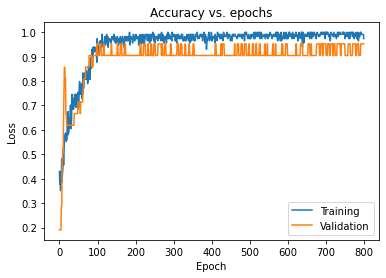

In [12]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

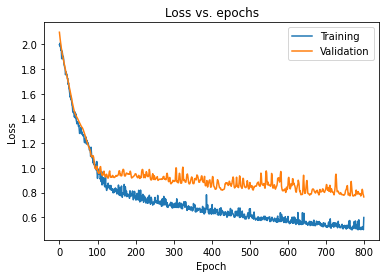

In [13]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [14]:

def get_callbacks():
    early_stopping=EarlyStopping(monitor='val_loss',mode='min',patience=30)
    learning_rate_reduction=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=20)
    return (early_stopping, learning_rate_reduction)

In [15]:
call_model = get_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [16]:
learning_rate_reduction.patience

20

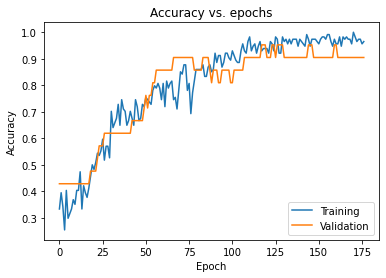

In [17]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

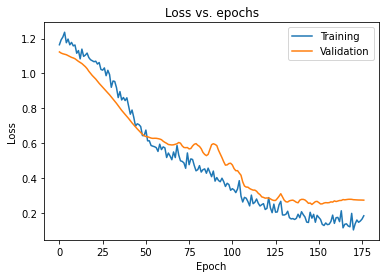

In [18]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [19]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.247
Test accuracy: 93.33%
